## 12. Linear predictors of theta length and theta decode concentration within the arm

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import spyglass as nd
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from scipy import linalg
import os
import pickle
import matplotlib.pyplot as plt
from ripple_detection.core import segment_boolean_series

from spyglass.common import (Session, IntervalList,LabMember, LabTeam, Raw, Session, Nwbfile,
                            Electrode,LFPBand,interval_list_intersect)
from spyglass.common import TaskEpoch
from spyglass.spikesorting.v0 import (SortGroup, 
                                    SpikeSortingRecording,SpikeSortingRecordingSelection)
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common.common_position import IntervalPositionInfo, RawPosition, IntervalLinearizedPosition, TrackGraph

[2025-02-26 20:47:56,164][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-02-26 20:47:56,242][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [5]:
from spyglass.shijiegu.Analysis_SGU import TrialChoice,EpochPos,MUA,get_linearization_map, TrialChoiceChangeOfMind
from spyglass.shijiegu.decodeHelpers import runSessionNames
from spyglass.shijiegu.ripple_add_replay import plot_decode_spiking
from spyglass.shijiegu.changeOfMind import (insertTrialChoiceChangeOfMind, find_turnaround_time, findProportion,
            find_trials, load_epoch_data_wrapper, find_direction, find_trials_animal, unique_stable)
from spyglass.shijiegu.changeOfMind_triggered import (find_triggered_animal,
    plot_physical_vs_mental_position, parse_to_transitions, find_large_position_minus_decode_trials)

[20:50:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[20:50:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [16]:
animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)

[21:19:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[21:19:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[21:19:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[21:19:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[21:19:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times
some missing position data
some missing position data


[21:19:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[21:19:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[21:19:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[21:19:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


In [98]:
animal = 'Eliot'
dates_to_plot = ['20221020','20221021','20221022']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)

[21:56:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[21:56:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times
some missing position data


[21:56:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[21:56:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[21:56:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[21:56:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[21:56:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[21:56:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[21:56:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[21:56:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[21:56:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[21:56:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[21:56:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[21:56:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[21:56:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


In [ ]:
# responses are - max decode to animal distance within +- 1 second of change of mind i
# predictors are - (1) animal proportion in at change of mind time i,
#                  (2) change of mind count on this trial: CoM_num
#                  (3) time to from initial home poke: t1
#                  (4) time to completion
#                  (5) total time of this trial
#                  (6) reward rate within last 10 trials
#                  (7) reward rate within last 4 trials
#                  (8) reward rate within last 1 trials

In [155]:
def find_recent_reward_num(log_df, back_num):
    # count back back_num trials
    recent_reward = np.array(log_df.loc[np.max([1,trialID - back_num]):trialID,"rewardNum"])
    if len(recent_reward) > 0:
        return np.sum(recent_reward == 2)/ len(recent_reward)
    return 0

In [339]:
def form_theta_predictors(triggered_positions, triggered_positions_abs,
                          triggered_decodes, triggered_decodes_abs,
                          triggered_decode_t, triggered_trial_info, nearby = False):
    # nearby: if true, it will assume input data are for nearby data

    Y,prop,CoM_num,t0,t1,t_total,reward10, reward12, reward4, reward3, reward1 = ([], [], [], [], [], [], [], [],[],[],[])
    
    for rendition_ind in range(len(triggered_trial_info)):
        trial_info = triggered_trial_info[rendition_ind]
        (nwb_copy_file_name, session_name, trialID, arm) = (trial_info)#'lewis20240110_.nwb', '06_Rev2Session3', 45, 3)
        
        position_abs = triggered_positions_abs[rendition_ind]
        position_abs_centered = triggered_positions[rendition_ind]
        decode_abs = triggered_decodes_abs[rendition_ind]
        decode_time = triggered_decode_t[rendition_ind]
        if len(position_abs) == len(decode_abs):
            max_theta = np.nanmax(np.abs(np.array(decode_abs) - np.array(position_abs)))
            if np.isnan(max_theta):
                continue
        else:
            continue
    
        # load log
        log_df = pd.read_pickle( (TrialChoiceChangeOfMind() & {"nwb_file_name": nwb_copy_file_name,
                                                               "epoch":int(session_name[:2])}).fetch1("change_of_mind_info") )
        if np.isnan(log_df.loc[trialID,"timestamp_H"]):
            continue
            
        Y.append(max_theta)
        # (1) animal proportion in at change of mind time i,
        if not nearby:
            prop.append(log_df.loc[trialID,"CoMMaxProportion"])
        else:
            max_theta_ind = np.nanargmax(np.abs(np.array(decode_abs) - np.array(position_abs)))
            prop.append( 0.01 * np.array(position_abs)[max_theta_ind] )
            
    
        # (2) change of mind count on this trial: CoM_num
        if len(log_df.loc[trialID,"CoM_t"]) > 0:
            CoM_t = np.array(log_df.loc[trialID,"CoM_t"][0])
            CoM_num.append(len(CoM_t))
        else:
            CoM_num.append(0)
    
        # (3) time from initial home poke: t0
        # infer change of mind time
        #np.argwhere(triggered_decodes[1].index == 0)

        t_ind = np.argsort(np.abs(position_abs_centered.index - 0))[0]
        
        t = np.array(decode_time.index)[t_ind]
        #t = t[0][0]
        t0.append( t - log_df.loc[trialID,"timestamp_H"])
    
        # (4) time to completion
        t1.append( log_df.loc[trialID,"timestamp_O"] - t )
    
        # (5) total time of the trial
        t_total.append( log_df.loc[trialID,"timestamp_O"] - log_df.loc[trialID,"timestamp_H"] )
    
        # (6) reward rate within last 10 trials
        reward10.append(find_recent_reward_num(log_df, 10))
        reward12.append(find_recent_reward_num(log_df, 12))
        reward4.append(find_recent_reward_num(log_df, 4))
        reward3.append(find_recent_reward_num(log_df, 3))
        reward1.append(find_recent_reward_num(log_df, 1))

    x = np.hstack((np.array(prop).reshape((-1,1)),np.array(CoM_num).reshape((-1,1)),
               np.array(t0).reshape((-1,1)),
               np.array(t1).reshape((-1,1)),np.array(t_total).reshape((-1,1)),
               np.array(reward10).reshape((-1,1)), np.array(reward4).reshape((-1,1)), np.array(reward1).reshape((-1,1))))
    y = np.array(Y).reshape((-1,1))
    predictor_names = ["proportion", "CoM num", "t from home", "t to completion","trial total t",
                      "rcnt 10 reward", "rcnt 4 reward", "rcnt 1 reward"]
    
    return y, x, predictor_names
        

### Do regression

In [221]:
import statsmodels.api as sm

In [377]:
x_animals = {}
y_animals = {}
x_animals_control = {}
y_animals_control = {}
results_animals = {}
results_animals_control = {}

In [379]:
animal = 'Eliot'
dates_to_plot = ['20221020','20221021','20221022']


encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True, nearby = False,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)

y, x, predictor_names = form_theta_predictors(triggered_positions, triggered_positions_abs,
                          triggered_decodes, triggered_decodes_abs,
                          triggered_decode_t, triggered_trial_info)

assert x.shape[1] == len(predictor_names)

x_ = sm.add_constant(x)
results = sm.OLS(y, x_).fit()
print(results.summary())
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

x_animals[animal] = x
y_animals[animal] = y
results_animals[animal] = results

[22:31:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:31:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times
some missing position data


[22:31:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:31:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:31:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[22:31:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[22:31:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:31:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[22:31:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:31:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:31:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:31:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[22:31:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:31:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:31:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     3.853
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000704
Time:                        22:31:40   Log-Likelihood:                -599.90
No. Observations:                 156   AIC:                             1216.
Df Residuals:                     148   BIC:                             1240.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

NameError: name 'results_animals' is not defined

Text(0.5, 1.0, "Eliot ['20221020', '20221021', '20221022']")

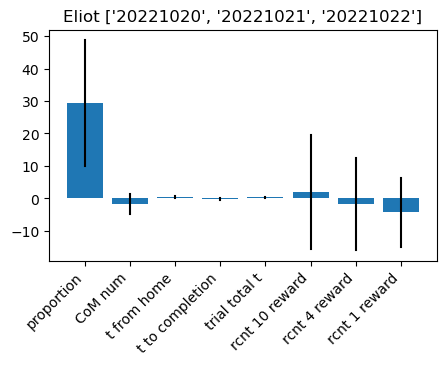

In [356]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3),sharex=True)

ax1.bar(predictor_names,np.array(df.coef)[1:])
for pred_ind in range(len(predictor_names)):
    
    ax1.plot([pred_ind,pred_ind],[df.loc['x'+str(pred_ind+1),'[0.025'],
                       df.loc['x'+str(pred_ind+1),'0.975]']],'k')
plt.xticks(rotation=45, ha='right');
ax1.set_title(animal + ' ' + str(dates_to_plot))

In [380]:
animal = 'Lewis'
dates_to_plot = ['20240106','20240107','20240108','20240109',
                 '20240110','20240113']

encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True, nearby = False,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)

y, x, predictor_names = form_theta_predictors(triggered_positions, triggered_positions_abs,
                          triggered_decodes, triggered_decodes_abs,
                          triggered_decode_t, triggered_trial_info)

assert x.shape[1] == len(predictor_names)

x_ = sm.add_constant(x)
results = sm.OLS(y, x_).fit()
print(results.summary())
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

x_animals[animal] = x
y_animals[animal] = y
results_animals[animal] = results

[22:31:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[22:31:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:31:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[22:31:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[22:31:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[22:31:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:31:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[22:31:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[22:31:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[22:31:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[22:31:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:31:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


some missing position data
currently investigating:
06_Rev2Session3
pos 5 valid times


[22:31:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[22:31:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[22:31:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:31:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[22:31:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[22:31:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times
some missing position data
some missing position data


[22:31:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:32:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[22:32:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[22:32:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times
currently investigating:
10_Rev2Session5
pos 9 valid times


[22:32:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[22:32:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:32:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[22:32:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.021
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           6.39e-08
Time:                        22:32:08   Log-Likelihood:                -1639.5
No. Observations:                 418   AIC:                             3295.
Df Residuals:                     410   BIC:                             3327.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

NameError: name 'results_animals' is not defined

Text(0.5, 1.0, "Lewis ['20240106', '20240107', '20240108', '20240109', '20240110', '20240113']")

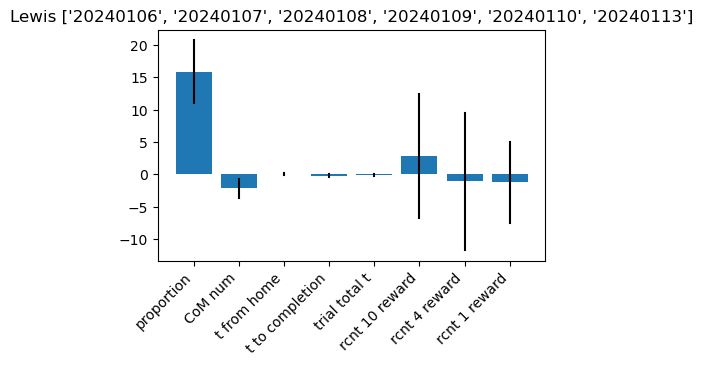

In [359]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3),sharex=True)

ax1.bar(predictor_names,np.array(df.coef)[1:])
for pred_ind in range(len(predictor_names)):
    
    ax1.plot([pred_ind,pred_ind],[df.loc['x'+str(pred_ind+1),'[0.025'],
                       df.loc['x'+str(pred_ind+1),'0.975]']],'k')
plt.xticks(rotation=45, ha='right');
ax1.set_title(animal + ' ' + str(dates_to_plot))

### Control: nearby non-Change-of-mind trials

In [382]:
animal = 'Eliot'
dates_to_plot = ['20221020','20221021','20221022']

encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True, nearby = True,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)
y_control, x_control, predictor_names = form_theta_predictors(triggered_positions, triggered_positions_abs,
                          triggered_decodes, triggered_decodes_abs,
                          triggered_decode_t, triggered_trial_info,nearby = True)

assert x.shape[1] == len(predictor_names)

x_ = sm.add_constant(x_control)
results = sm.OLS(y_control, x_).fit()
print(results.summary())
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

x_animals_control[animal] = x_control
y_animals_control[animal] = y_control
results_animals_control[animal] = results

[22:32:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:32:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[22:32:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:32:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:32:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[22:32:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[22:32:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:32:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[22:32:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:32:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:32:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[22:32:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[22:32:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[22:32:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[22:32:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.749
Date:                Thu, 27 Feb 2025   Prob (F-statistic):              0.116
Time:                        22:32:59   Log-Likelihood:                -400.42
No. Observations:                 122   AIC:                             814.8
Df Residuals:                     115   BIC:                             834.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

NameError: name 'results_animals_control' is not defined

Text(0.5, 1.0, "Eliot ['20221020', '20221021', '20221022'] nearby trials")

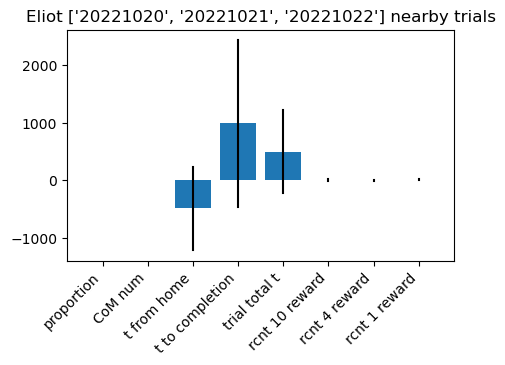

In [371]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3),sharex=True)

ax1.bar(predictor_names,np.array(df.coef)[1:])
for pred_ind in range(len(predictor_names)):

    interval = np.array([df.loc['x'+str(pred_ind+1),'[0.025'],
                df.loc['x'+str(pred_ind+1),'0.975]']])
    
    ax1.plot([pred_ind,pred_ind],interval,'k')
plt.xticks(rotation=45, ha='right');
ax1.set_title(animal + ' ' + str(dates_to_plot) + ' nearby trials')

In [ ]:
animal = 'Lewis'
dates_to_plot = ['20240106','20240107','20240108','20240109',
                 '20240110']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs, triggered_decode_t,
 triggered_trial_info) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True, nearby = True,
                                                                   multiple_CoM = False, first_CoM = False, last_CoM = False)
y_control, x_control, predictor_names = form_theta_predictors(triggered_positions, triggered_positions_abs,
                          triggered_decodes, triggered_decodes_abs,
                          triggered_decode_t, triggered_trial_info,nearby = True)

assert x.shape[1] == len(predictor_names)

x_ = sm.add_constant(x_control)
results = sm.OLS(y_control, x_).fit()
print(results.summary())
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

x_animals_control[animal] = x_control
y_animals_control[animal] = y_control
results_animals_control[animal] = results

Text(0.5, 1.0, "Lewis ['20240106', '20240107', '20240108', '20240109', '20240110'] nearby trials")

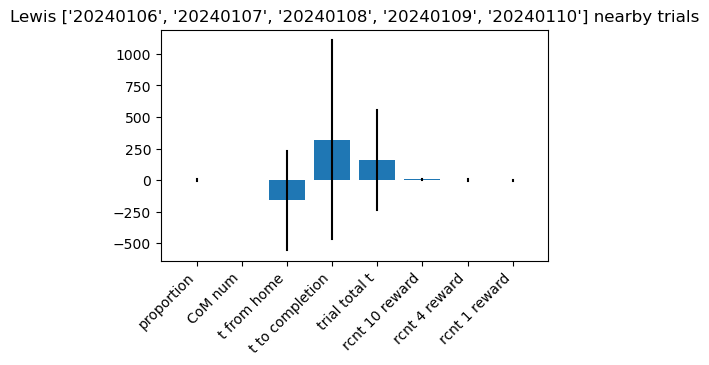

In [376]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3),sharex=True)

ax1.bar(predictor_names,np.array(df.coef)[1:])
for pred_ind in range(len(predictor_names)):

    interval = np.array([df.loc['x'+str(pred_ind+1),'[0.025'],
                df.loc['x'+str(pred_ind+1),'0.975]']])
    
    ax1.plot([pred_ind,pred_ind],interval,'k')
plt.xticks(rotation=45, ha='right');
ax1.set_title(animal + ' ' + str(dates_to_plot) + ' nearby trials')

### merge control and noncontrol

In [ ]:
x_animals_control[animal] = x_control
y_animals_control[animal] = y_control
results_animals_control[animal] = results

In [303]:
animal = "Eliot"

x = x_animals[animal]
x_control = x_animals_control[animal]
y = y_animals[animal]
y_control = y_animals_control[animal]

condition = np.zeros((x.shape[0],1)) + 1
x_condition = np.hstack((x,condition)) # ,condition * x[:,0].reshape((-1,1))))

condition = np.zeros((x_control.shape[0],1)) - 1
x_condition_control = np.hstack((x_control, condition)) #, condition * x_control[:,0].reshape((-1,1))))
X = np.vstack((x_condition, x_condition_control))
X_ = sm.add_constant(X)
Y = np.vstack((y, y_control))

In [318]:
results = sm.OLS(Y, X_[:,[0,1,-1]]).fit()

In [319]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.214
Date:                Thu, 27 Feb 2025   Prob (F-statistic):            0.00229
Time:                        21:48:11   Log-Likelihood:                -1035.5
No. Observations:                 278   AIC:                             2077.
Df Residuals:                     275   BIC:                             2088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4840      2.396      4.792      0.0